<a href="https://colab.research.google.com/github/hkbharath/ComputerVision/blob/main/FaceMarkers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import cv2
import urllib.request as urlreq
import os
import matplotlib.pyplot as plt
from pylab import rcParams

In [35]:
pics_url = "https://pyxis.nymag.com/v1/imgs/e9f/d4e/c597464e07cff19c61fdde524bec712db4-brad-pitt.rsquare.w330.jpg"

pic = "image.jpg"

urlreq.urlretrieve(pics_url, pic)
#pic = "/content/IMG_20200926_175913_Small2Square.jpg"
image = cv2.imread(pic)

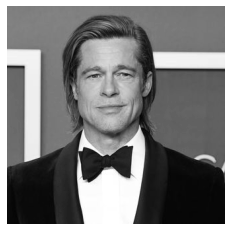

In [36]:
#Visualizing the image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
image_template = image_rgb.copy()
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.imshow(image_gray, cmap = "gray")

File exists


Text(0.5, 1.0, 'Face Detection')

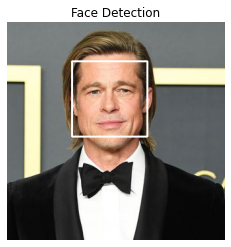

In [37]:
#Fetch Haar cascade to detect faces
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"
haarcascade = "haarcascade_frontalface_alt2.xml"

if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

detector = cv2.CascadeClassifier(haarcascade)
faces = detector.detectMultiScale(image_gray)

for face in faces:
    (x,y,w,d) = face
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(image_template)
plt.title('Face Detection')

File exists


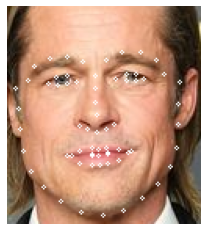

In [38]:
# Fetch LBF model to create face marker
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

LBFmodel = "lbfmodel.yaml"

if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

_, landmarks = landmark_detector.fit(image_gray, faces)

for landmark in landmarks:
    for x,y in landmark[0]:
        cv2.circle(image_rgb, (x, y), 1, (255, 255, 255), 1)
plt.axis("off")
for face in faces:
  (x,y,w,d) = face
  img_cropped = image_rgb[y:(y+d+25), x:(x+w+10)]
  #(x,y),(x+w, y+d),(255, 255, 255), 2
  plt.imshow(img_cropped)